In [144]:
import seaborn as sns
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
sns.set()
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [145]:
# Load data from df_res.csv
df_res=pd.read_csv('df_res.csv')
df_res.head()

,Restaurant name,Neighborhood,Borough,Median Household Income,Neighborhood Latitude,Neighborhood Longitude,Pop./km2,Venue Category,Venue Latitude,Venue Longitude,Competitors
0,White Castle_0,Allerton,Bronx,37816.894737,40.865788,-73.859319,12149.0,Fast Food Restaurant,40.866065,-73.862307,4
1,Li's Kitchen_1,Allerton,Bronx,37816.894737,40.865788,-73.859319,12149.0,Chinese Restaurant,40.863566,-73.858372,4
2,Chef King_2,Allerton,Bronx,37816.894737,40.865788,-73.859319,12149.0,Chinese Restaurant,40.865561,-73.856752,4
3,Internacional Restaurant & Deli_3,Allerton,Bronx,37816.894737,40.865788,-73.859319,12149.0,Spanish Restaurant,40.863809,-73.856640,4
4,Il Sogno_762,Annadale,Staten Island,66764.200000,40.538114,-74.178549,2593.0,Restaurant,40.541286,-74.178489,1


In [146]:
df1=df_res[['Restaurant name','Median Household Income','Pop./km2','Competitors']]
df1.head()

,Restaurant name,Median Household Income,Pop./km2,Competitors
0,White Castle_0,37816.894737,12149.0,4
1,Li's Kitchen_1,37816.894737,12149.0,4
2,Chef King_2,37816.894737,12149.0,4
3,Internacional Restaurant & Deli_3,37816.894737,12149.0,4
4,Il Sogno_762,66764.200000,2593.0,1


In [147]:
#  let's normalize the dataset.
from sklearn.preprocessing import StandardScaler

X = df1.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset


C:\Users\lenor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lenor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.20642726, -0.54278356, -0.92300793],
       [-1.20642726, -0.54278356, -0.92300793],
       [-1.20642726, -0.54278356, -0.92300793],
       ...,
       [ 1.14337602,  1.15426539,  0.15670275],
       [ 1.14337602,  1.15426539,  0.15670275],
       [ 1.14337602,  1.15426539,  0.15670275]])

In [148]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 ... 3 3 3]


In [149]:
df1["Labels"] = labels
df1.head()

C:\Users\lenor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Restaurant name,Median Household Income,Pop./km2,Competitors,Labels
0,White Castle_0,37816.894737,12149.0,4,0
1,Li's Kitchen_1,37816.894737,12149.0,4,0
2,Chef King_2,37816.894737,12149.0,4,0
3,Internacional Restaurant & Deli_3,37816.894737,12149.0,4,0
4,Il Sogno_762,66764.200000,2593.0,1,0


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>

In [21]:
from matplotlib.colors import ListedColormap
palette=sns.color_palette(sns.hls_palette(5, l=.5, s=1.0))
cmap1=ListedColormap(palette.as_hex())
sns.set(font_scale=1)  # crazy big

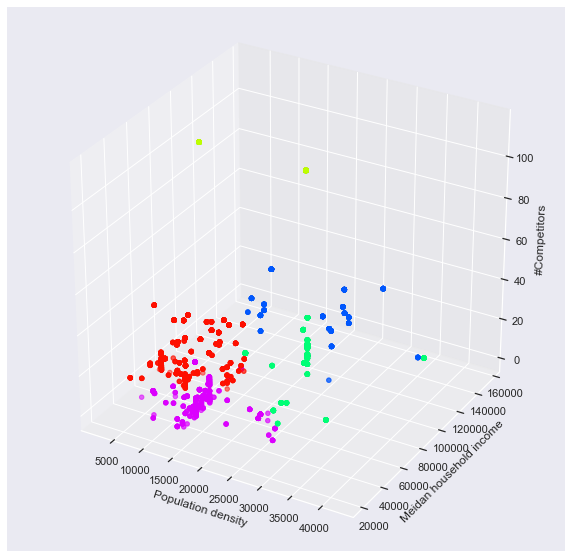

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
c={}
ax.scatter(df1["Pop./km2"], df1["Median Household Income"], df1["Competitors"], c=df1["Labels"],cmap=cmap1)

ax.set_xlabel('Population density')
ax.set_ylabel('Meidan household income')
ax.set_zlabel('#Competitors')

plt.show()

C:\Users\lenor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


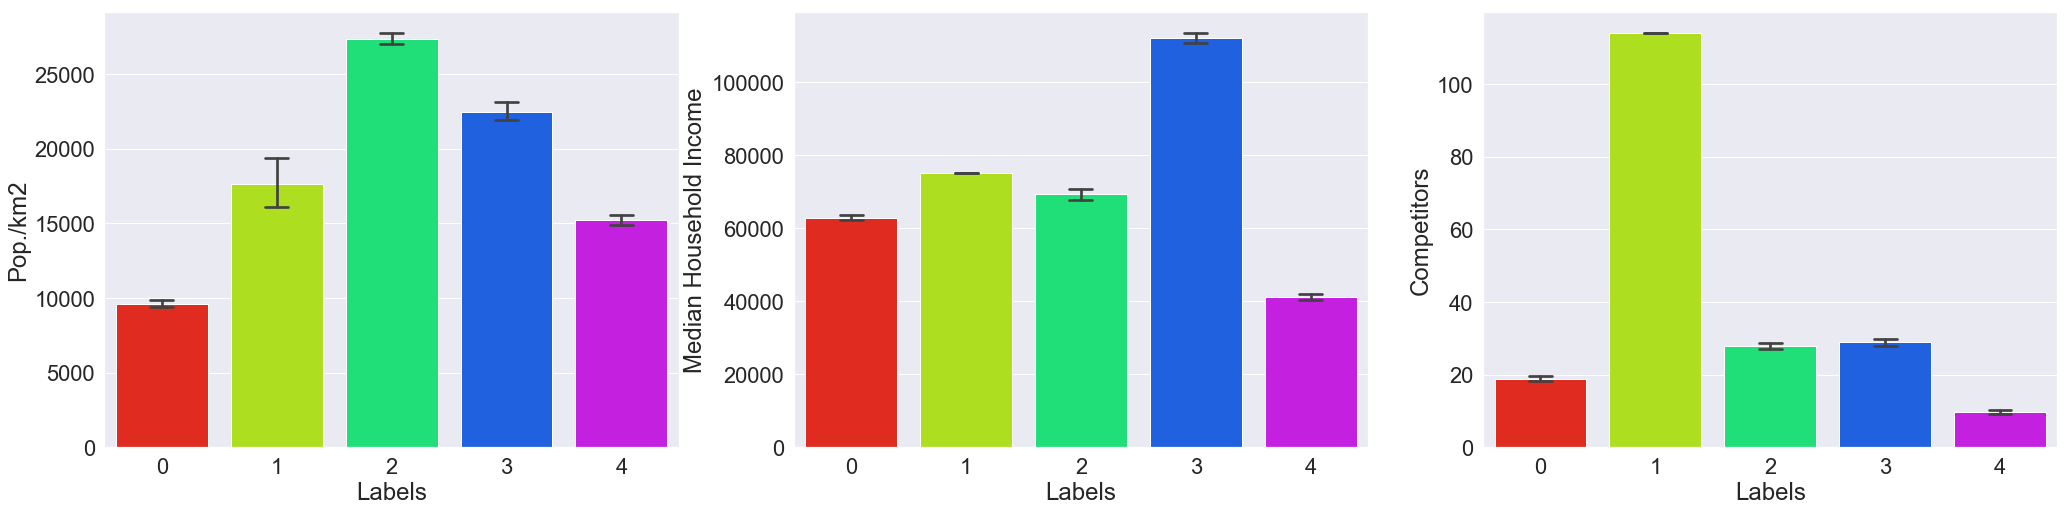

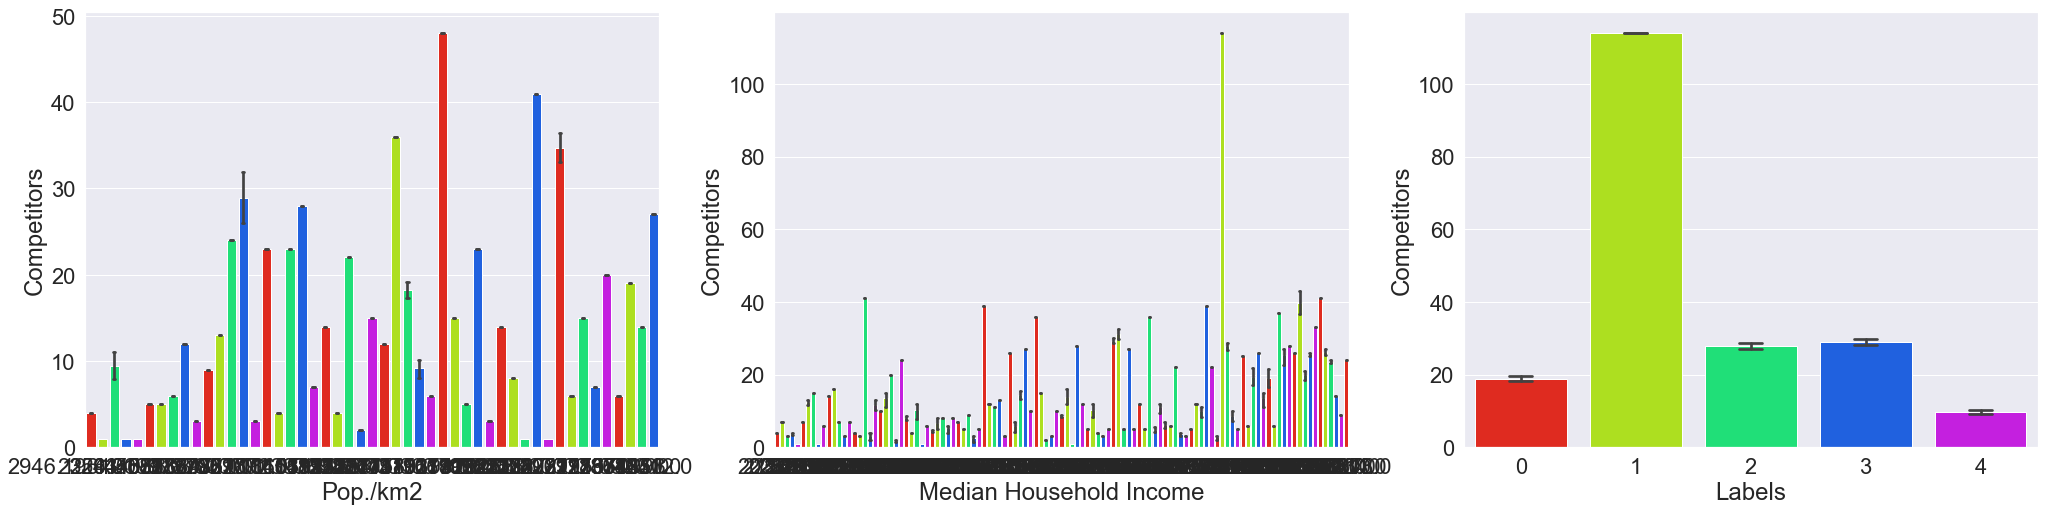

In [24]:
fig=plt.figure(figsize=(35,8))
sns.set(font_scale=2) 
plt.subplot(131)
ax1 = sns.barplot(x="Pop./km2", y="Competitors", data=df1, capsize=.2,palette=palette)
plt.subplot(132)
ax2 = sns.barplot(x="Median Household Income", y="Competitors", data=df1, capsize=.2,palette=palette)

plt.subplot(133)
ax3 = sns.barplot(x="Labels", y="Competitors", data=df1, capsize=.2,palette=palette)

In [25]:
# list the data types for each column
print(df1.dtypes)

Restaurant name             object
Median Household Income    float64
Pop./km2                   float64
Competitors                  int64
Labels                       int32
dtype: object


In [26]:
df1.corr()

,Median Household Income,Pop./km2,Competitors,Labels
Median Household Income,1.000000,0.367786,0.237639,0.027134
Pop./km2,0.367786,1.000000,0.221071,0.439724
Competitors,0.237639,0.221071,1.000000,-0.129380
Labels,0.027134,0.439724,-0.129380,1.000000


SyntaxError: invalid syntax (<ipython-input-27-06d9adf93d8c>, line 1)

,Median Household Income,Pop./km2,Competitors
Neighborhood,,,
Allerton,37816.894737,12149.0,4
Annadale,66764.200000,2593.0,1
Arlington,66764.200000,4440.0,1
Arrochar,66764.200000,2326.0,4
Arverne,39432.000000,4583.0,1


,Median Household Income,Pop./km2,Competitors
Median Household Income,1.000000,0.173180,0.371513
Pop./km2,0.173180,1.000000,0.420531
Competitors,0.371513,0.420531,1.000000


In [50]:
msk = np.random.rand(len(df_nei)) < 0.8
train = df_nei[msk]
test = df_nei[~msk]

array([4, 1, 1, 4, 1], dtype=int64)

## Normalize Data 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

# Classification 

In [69]:
# Classification 

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Median Household Income']])
train_y = np.asanyarray(train[['Competitors']])

test_x = np.asanyarray(test[['Median Household Income']])
test_y = np.asanyarray(test[['Competitors']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.00000000e+00 6.12958493e-04 3.86609421e-09]]
Intercept:  [1.38758902]


In [70]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 7.60
Residual sum of squares (MSE): 112.70
R2-score: -2.71


Text(0, 0.5, 'Competitors')

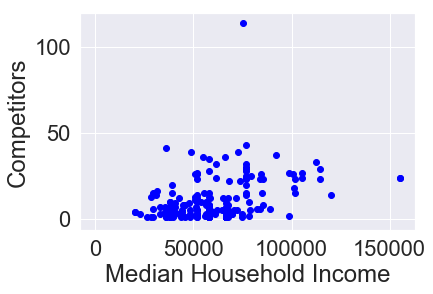

Coefficients:  [[0.00000000e+00 6.12958493e-04 3.86609421e-09]]
Intercept:  [1.38758902]


Text(0, 0.5, 'Competitors')

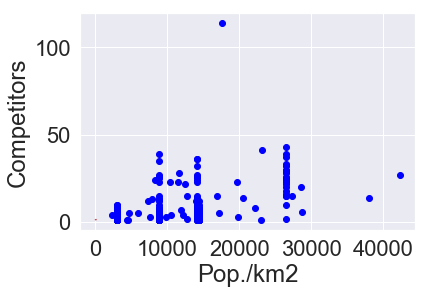

In [71]:
train_x = np.asanyarray(train[['Pop./km2']])
train_y = np.asanyarray(train[['Competitors']])

test_x = np.asanyarray(test[['Pop./km2']])
test_y = np.asanyarray(test[['Competitors']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
plt.scatter(train['Pop./km2'], train['Competitors'],  color='blue')
XX = np.arange(0.0, 100.0, 1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Pop./km2")
plt.ylabel("Competitors")

In [ ]:
plt.scatter(train['Median Household Income'], train['Competitors,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Median Household Income")
plt.ylabel("Competitors")

In [77]:
df_nei.describe()

,Median Household Income,Pop./km2,Competitors
count,264.000000,264.000000,264.000000
mean,59633.688902,13026.696469,10.268939
std,21780.942421,7497.225819,12.118851
min,20334.000000,2326.000000,1.000000
25%,44026.750000,8803.967071,3.000000
50%,57813.625000,14153.791939,5.000000
75%,66956.650000,14353.379074,14.000000
max,155213.000000,42312.000000,114.000000


Let's calculate the  Pearson Correlation Coefficient and P-value 

In [39]:
from scipy import stats

#  Median Household Income VS Competitors

pearson_coef, p_value = stats.pearsonr(df_nei['Median Household Income'], df_nei['Competitors'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  



The Pearson Correlation Coefficient is 0.371513161405408  with a P-value of P = 4.599042577421245e-10


<h5>Conclusion:</h5>
Since the p-value is < 0.001, the correlation between Median Household Income and Competitors is statistically significant, although the linear relationship isn't extremely strong (~0.37)

[]

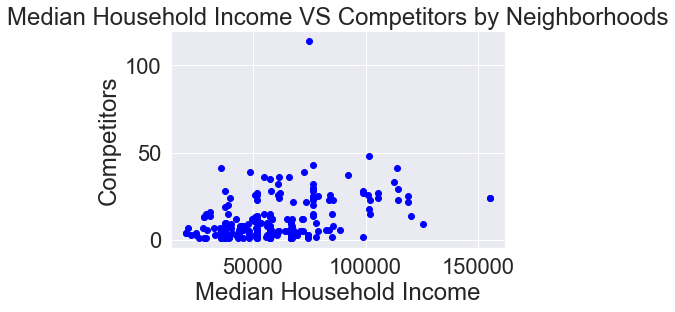

In [67]:
plt.scatter(df_nei['Median Household Income'], df_nei['Competitors'],  color='blue')
plt.xlabel("Median Household Income")
plt.ylabel("Competitors")
plt.title('Median Household Income VS Competitors by Neighborhoods')
plt.plot()

From the plt, we can see that when the neighborhoods have a higher Median Household Income, they have more competitors.
Let's find the neiborhoods which has Median Household Income more than 66956(75%) but Competitor less than 10(mean).

In [74]:
df_nei.head()

,Median Household Income,Pop./km2,Competitors
Neighborhood,,,
Allerton,37816.894737,12149.0,4
Annadale,66764.200000,2593.0,1
Arlington,66764.200000,4440.0,1
Arrochar,66764.200000,2326.0,4
Arverne,39432.000000,4583.0,1


In [118]:
df_nei['MHI>66956']=df_nei['Median Household Income'].apply(lambda x: x if x>66956 else 0 )
df_nei['Com<10']=df_nei['Competitors'].apply(lambda x: x if x<10 else 0)
df_nei.head()

,Median Household Income,Pop./km2,Competitors,MHI>66956,Com<10
Neighborhood,,,,,
Allerton,37816.894737,12149.0,4,0.0,4
Annadale,66764.200000,2593.0,1,0.0,1
Arlington,66764.200000,4440.0,1,0.0,1
Arrochar,66764.200000,2326.0,4,0.0,4
Arverne,39432.000000,4583.0,1,0.0,1


In [41]:

#  Median Household Income VS Competitors

pearson_coef, p_value = stats.pearsonr(df_nei['Pop./km2'], df_nei['Competitors'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  


The Pearson Correlation Coefficient is 0.42053101706154067  with a P-value of P = 9.755032017842224e-13


<h5>Conclusion:</h5>
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.42).
Let's find the neiborhoods which has Median Household Income more than 66956(75%) but Competitor less than 10(mean).

[]

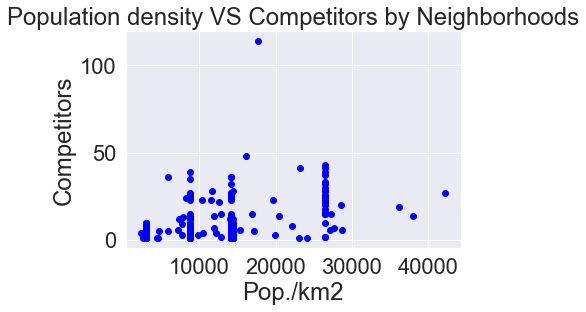

In [63]:
plt.scatter(df_nei['Pop./km2'], df_nei['Competitors'],  color='blue')
plt.xlabel("Pop./km2")
plt.ylabel("Competitors")
plt.title('Population density VS Competitors by Neighborhoods')
plt.plot()

In [ ]:
Let's find the neiborhoods which has Population desity more than 14353(75%) but Competitors less than 10(mean).

In [119]:
df_nei['Pop>14353']=df_nei['Pop./km2'].apply(lambda x: x if x>14353 else 0 )
df_nei['Com2<10']=df_nei['Competitors'].apply(lambda x: x if x<10 else 0)
df_nei.head()

,Median Household Income,Pop./km2,Competitors,MHI>66956,Com<10,Pop>14353,Com2<10
Neighborhood,,,,,,,
Allerton,37816.894737,12149.0,4,0.0,4,0.0,4
Annadale,66764.200000,2593.0,1,0.0,1,0.0,1
Arlington,66764.200000,4440.0,1,0.0,1,0.0,1
Arrochar,66764.200000,2326.0,4,0.0,4,0.0,4
Arverne,39432.000000,4583.0,1,0.0,1,0.0,1


In [128]:
df1=df_nei.loc[df_nei['MHI>66956']!=0]
df1=df1.loc[df1['Com<10']!=0]
df1=df1.loc[df1['Pop>14353']!=0]
df1=df1.loc[df1['Com2<10']!=0]
df1.drop(['Median Household Income','Pop./km2','Competitors','Com2<10'], axis=1, inplace=True)
df1.reset_index(inplace=True)
df1

,Neighborhood,MHI>66956,Com<10,Pop>14353
0,Edgewater Park,67549.0,8,14353.379074
1,Forest Hills,67881.0,6,15279.000000
2,North Riverdale,78895.0,5,14353.379074
3,Roosevelt Island,98797.0,2,26482.390996
4,Schuylerville,67549.0,5,14353.379074
5,Spuyten Duyvil,67534.0,1,14353.379074
6,Throgs Neck,67549.0,4,14353.379074


In [142]:
df2=df_res.loc[df_res['Neighborhood'].isin(df1['Neighborhood'])]
df2.reset_index(inplace=True, drop=True)
df2

,Restaurant name,Neighborhood,Borough,Median Household Income,Neighborhood Latitude,Neighborhood Longitude,Pop./km2,Venue Category,Venue Latitude,Venue Longitude,Competitors
0,Muscle Maker Grill_1421,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,American Restaurant,40.819391,-73.817298,8
1,Patricia's of Tremont_1422,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Italian Restaurant,40.823119,-73.819403,8
2,Green Dragon_1423,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Asian Restaurant,40.818878,-73.816793,8
3,Tosca Marquee_1424,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Italian Restaurant,40.819222,-73.817601,8
4,Spoto's Italian Restaurant_1425,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Italian Restaurant,40.820399,-73.817702,8
5,Rino's Italian Restaurant_1426,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Italian Restaurant,40.821231,-73.818743,8
6,Throgs Neck Fried Chicken_1427,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Fast Food Restaurant,40.820301,-73.817791,8
7,Xing hui linda_1428,Edgewater Park,Bronx,67549.0,40.821986,-73.813885,14353.379074,Chinese Restaurant,40.820322,-73.818159,8
8,Bangkok Cuisine_1497,Forest Hills,Queens,67881.0,40.725264,-73.844475,15279.000000,Thai Restaurant,40.721062,-73.845432,6
9,Great Wall Chinese Restaurant_1498,Forest Hills,Queens,67881.0,40.725264,-73.844475,15279.000000,Chinese Restaurant,40.723596,-73.847968,6


In [139]:
df2.shape

(31, 11)

In [16]:
# merge to get venue latitude and longitude

df_merge=df1.set_index('Restaurant name').join(df_res.drop(['Median Household Income','Pop./km2','Competitors'], axis=1).set_index('Restaurant name'))
df_merge.reset_index(inplace=True)
df_merge.head()

,Restaurant name,Median Household Income,Pop./km2,Competitors,Labels,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue Category,Venue Latitude,Venue Longitude
0,White Castle_0,37816.894737,12149.0,4,2,Allerton,Bronx,40.865788,-73.859319,Fast Food Restaurant,40.866065,-73.862307
1,Li's Kitchen_1,37816.894737,12149.0,4,2,Allerton,Bronx,40.865788,-73.859319,Chinese Restaurant,40.863566,-73.858372
2,Chef King_2,37816.894737,12149.0,4,2,Allerton,Bronx,40.865788,-73.859319,Chinese Restaurant,40.865561,-73.856752
3,Internacional Restaurant & Deli_3,37816.894737,12149.0,4,2,Allerton,Bronx,40.865788,-73.859319,Spanish Restaurant,40.863809,-73.856640
4,Il Sogno_762,66764.200000,2593.0,1,4,Annadale,Staten Island,40.538114,-74.178549,Restaurant,40.541286,-74.178489



Finally, let's visualize the resulting clusters

In [17]:
len(df_merge['Venue Category'].str.)

90

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## 5. Examine Clusters

#### Cluster 1

In [13]:
df_c1=df_merge.loc[df_merge['Labels'] == 0, df_merge.columns[[0] + list(range(1, df_merge.shape[1]))]]
print("Numbers of restaurants in Cluster 1: ", df_c1.shape[0])
df_c1.head()

Numbers of restaurants in Cluster 1:  350


,Restaurant name,Median Household Income,Pop./km2,Competitors,Labels,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue Category,Venue Latitude,Venue Longitude
327,Lex Restaurant_1067,155213.0,26482.390996,24,0,Carnegie Hill,Manhattan,40.782683,-73.953256,Italian Restaurant,40.782530,-73.953700
328,Sfoglia_1068,155213.0,26482.390996,24,0,Carnegie Hill,Manhattan,40.782683,-73.953256,Italian Restaurant,40.783419,-73.952768
329,Dig Inn_1069,155213.0,26482.390996,24,0,Carnegie Hill,Manhattan,40.782683,-73.953256,American Restaurant,40.780312,-73.954745
330,Table d'Hote_1070,155213.0,26482.390996,24,0,Carnegie Hill,Manhattan,40.782683,-73.953256,French Restaurant,40.784492,-73.955712
331,Naruto Ramen_1071,155213.0,26482.390996,24,0,Carnegie Hill,Manhattan,40.782683,-73.953256,Ramen Restaurant,40.781074,-73.952299


## One Hot Encoding  

#### Feature befor One Hot Encoding

In [14]:


df[['Principal','terms','age','Gender','education']].head()

NameError: name 'df' is not defined

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [ ]:
Feature = df[['terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np



def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = df1.shape[0]

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
df1

In [ ]:
plt.figure()
plt.plot(df_merge['Neighborhood Latitude'],df_merge['Neighborhood Longitude'],df_merge['Labels'])

In [ ]:
df_merge.head()